<font color='green' size='6'>**Домашняя работа 2**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных https://archive.ics.uci.edu/dataset/109/wine.


**Что нужно сделать:**

0. Загрузите данные https://archive.ics.uci.edu/dataset/109/wine, например вот так
```
from sklearn.datasets import load_wine  
data = load_wine()


1. Проведите разведочный анализ данных (EDA)

2. Если есть пропуски, заполнить пропуски

3. Уменьшить размерность с помощью PCA до 2 компонент

4. Оцените долю сохраненной дисперсии

5. Постройте scatterplot 1-ой и 2-ой главной компоненты, окрасить точки в зависиости от target (столбец class)







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Загрузка данных Wine
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Создание DataFrame 
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [3]:
print(f"Размер датасета: {df.shape[0]} строк × {df.shape[1]} столбцов")
print(f"Размер в памяти: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

Размер датасета: 178 строк × 14 столбцов
Размер в памяти: 19.60 KB


In [7]:
print(f"\nПРИЗНАКИ ВИНА:")
for i, feature in enumerate(feature_names, 1):
    print(f"{i:2d}. {feature}")

print(f"\nРАСПРЕДЕЛЕНИЕ КЛАССОВ:")
class_counts = df['target'].value_counts().sort_index()
for i, (class_idx, count) in enumerate(class_counts.items()):
    percentage = count / len(df) * 100
    print(f"Класс {class_idx} ({target_names[class_idx]}): {count} образцов ({percentage:.1f}%)")

print(f"\n СТАТИСТИЧЕСКИЙ АНАЛИЗ ПРИЗНАКОВ:")
print("-" * 50)
stats_summary = df.drop('target', axis=1).describe()
print("Топ-5 признаков по среднему значению:")
top_features = stats_summary.loc['mean'].nlargest(5)
for feature, value in top_features.items():
    print(f"  {feature}: {value:.2f}")

print("\nТоп-5 признаков по вариативности (стд. отклонение):")
top_std_features = stats_summary.loc['std'].nlargest(5)
for feature, value in top_std_features.items():
    print(f"  {feature}: {value:.2f}")


ПРИЗНАКИ ВИНА:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

РАСПРЕДЕЛЕНИЕ КЛАССОВ:
Класс 0 (class_0): 59 образцов (33.1%)
Класс 1 (class_1): 71 образцов (39.9%)
Класс 2 (class_2): 48 образцов (27.0%)

 СТАТИСТИЧЕСКИЙ АНАЛИЗ ПРИЗНАКОВ:
--------------------------------------------------
Топ-5 признаков по среднему значению:
  proline: 746.89
  magnesium: 99.74
  alcalinity_of_ash: 19.49
  alcohol: 13.00
  color_intensity: 5.06

Топ-5 признаков по вариативности (стд. отклонение):
  proline: 314.91
  magnesium: 14.28
  alcalinity_of_ash: 3.34
  color_intensity: 2.32
  malic_acid: 1.12


In [10]:


print("2. АНАЛИЗ ПРОПУСКОВ")

missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing > 0:
    print(f" Обнаружено {total_missing} пропусков:")
    missing_info = missing_values[missing_values > 0]
    for feature, count in missing_info.items():
        percentage = count / len(df) * 100
        print(f"  • {feature}: {count} пропусков ({percentage:.1f}%)")
else:
    print("Пропусков в данных не обнаружено")

2. АНАЛИЗ ПРОПУСКОВ
Пропусков в данных не обнаружено


In [11]:
X_scaled = StandardScaler().fit_transform(X)

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создание DataFrame с результатами PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['wine_class'] = [target_names[i] for i in y]

In [14]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("ДОЛЯ СОХРАНЕННОЙ ДИСПЕРСИИ:")
print(f"1-я главная компонента (PC1): {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%)")
print(f"2-я главная компонента (PC2): {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.2f}%)")
print(f"Суммарно сохранено: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

# Анализ вклада признаков в главные компоненты
print(f"\n ВКЛАД ПРИЗНАКОВ В ГЛАВНЫЕ КОМПОНЕНТЫ:")
print("-" * 50)

components_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

print("Топ-5 признаков для PC1:")
pc1_top = components_df['PC1'].abs().nlargest(5)
for feature, value in pc1_top.items():
    print(f"  {feature}: {value:.3f}")

print("\nТоп-5 признаков для PC2:")
pc2_top = components_df['PC2'].abs().nlargest(5)
for feature, value in pc2_top.items():
    print(f"  {feature}: {value:.3f}")

ДОЛЯ СОХРАНЕННОЙ ДИСПЕРСИИ:
1-я главная компонента (PC1): 0.3620 (36.20%)
2-я главная компонента (PC2): 0.1921 (19.21%)
Суммарно сохранено: 0.5541 (55.41%)

 ВКЛАД ПРИЗНАКОВ В ГЛАВНЫЕ КОМПОНЕНТЫ:
--------------------------------------------------
Топ-5 признаков для PC1:
  flavanoids: 0.423
  total_phenols: 0.395
  od280/od315_of_diluted_wines: 0.376
  proanthocyanins: 0.313
  nonflavanoid_phenols: 0.299

Топ-5 признаков для PC2:
  color_intensity: 0.530
  alcohol: 0.484
  proline: 0.365
  ash: 0.316
  magnesium: 0.300


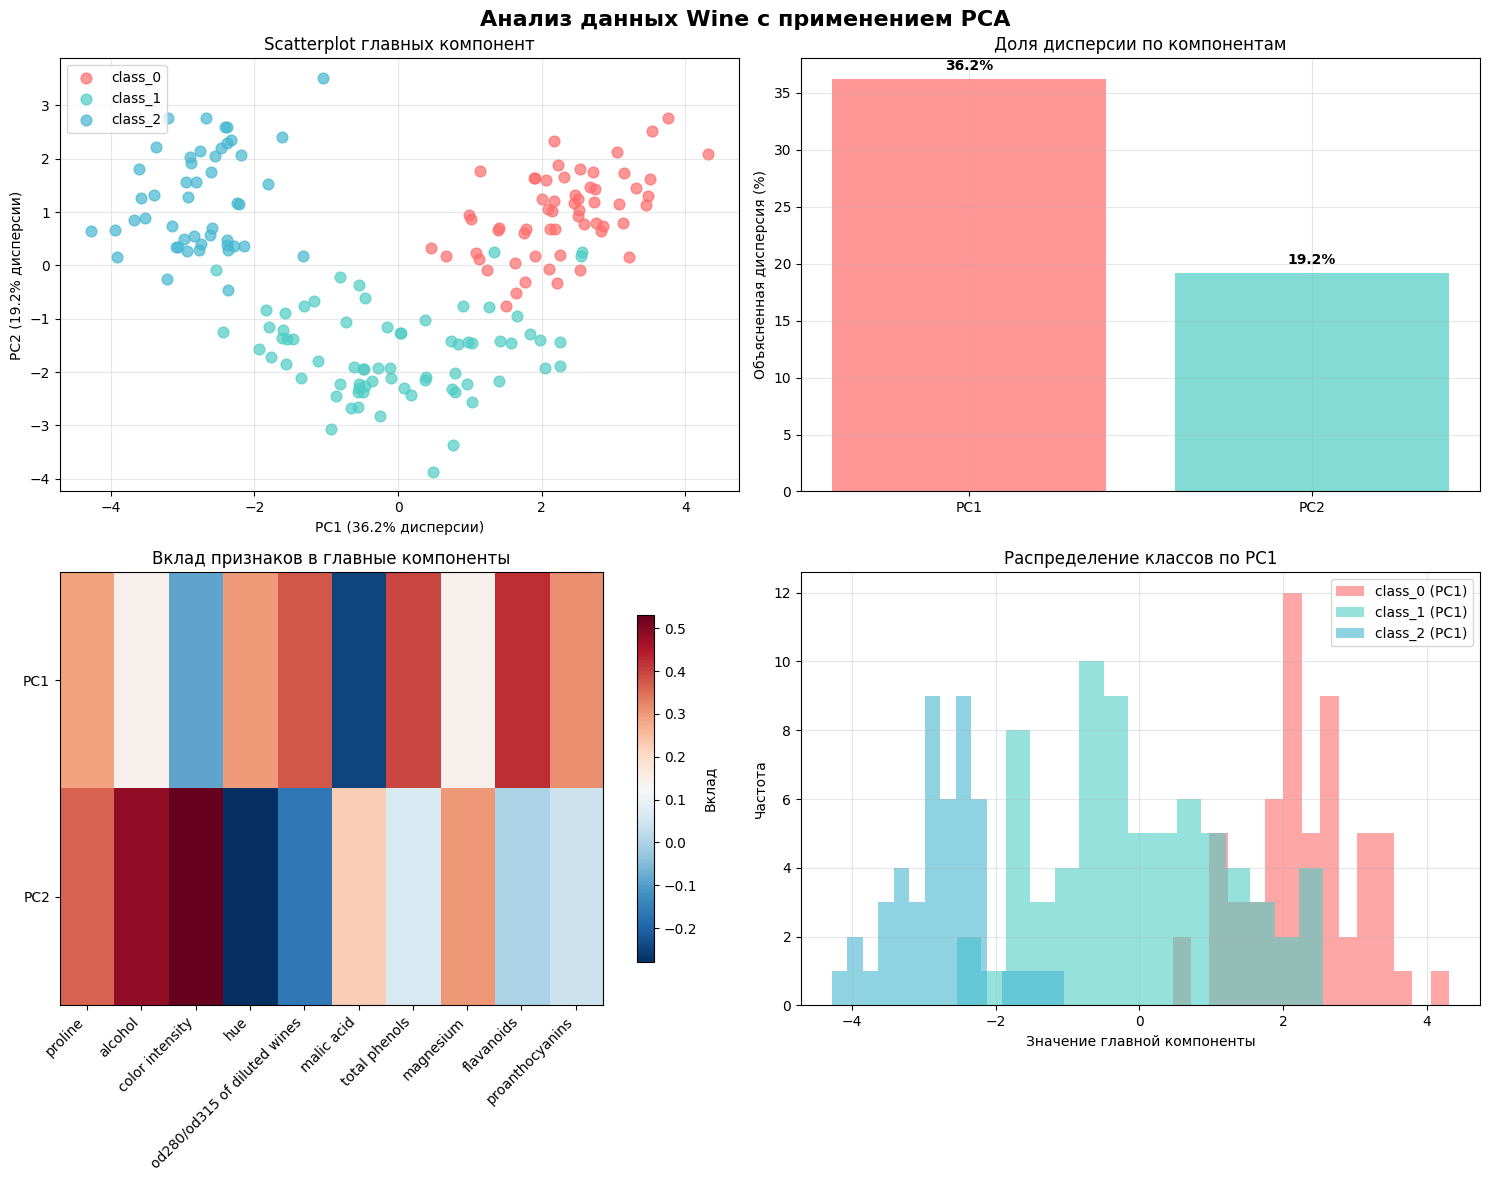


📊 СТАТИСТИКА КЛАССОВ В PCA ПРОСТРАНСТВЕ:
--------------------------------------------------

class_0:
  PC1: μ=2.283, σ=0.807
  PC2: μ=0.968, σ=0.773

class_1:
  PC1: μ=-0.039, σ=1.254
  PC2: μ=-1.643, σ=0.822

class_2:
  PC1: μ=-2.748, σ=0.647
  PC2: μ=1.241, σ=0.940


In [15]:
# Создание комплексной визуализации
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Анализ данных Wine с применением PCA', fontsize=16, fontweight='bold')

# График 1: Scatterplot главных компонент
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax1 = axes[0, 0]
for i, (class_name, color) in enumerate(zip(target_names, colors)):
    mask = pca_df['target'] == i
    ax1.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], 
                color=color, label=class_name, alpha=0.7, s=60)

ax1.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% дисперсии)')
ax1.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% дисперсии)')
ax1.set_title('Scatterplot главных компонент')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Объясненная дисперсия
ax2 = axes[0, 1]
components = ['PC1', 'PC2']
bars = ax2.bar(components, explained_variance_ratio * 100, 
               color=['#FF6B6B', '#4ECDC4'], alpha=0.7)
ax2.set_ylabel('Объясненная дисперсия (%)')
ax2.set_title('Доля дисперсии по компонентам')
ax2.grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar, value in zip(bars, explained_variance_ratio * 100):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# График 3: Heatmap вклада признаков
ax3 = axes[1, 0]
# Выбираем топ-10 признаков по абсолютному вкладу
top_features_mask = (components_df.abs().sum(axis=1)).nlargest(10).index
heatmap_data = components_df.loc[top_features_mask]

im = ax3.imshow(heatmap_data.T, cmap='RdBu_r', aspect='auto')
ax3.set_xticks(range(len(heatmap_data.index)))
ax3.set_xticklabels([name.replace('_', ' ') for name in heatmap_data.index], 
                    rotation=45, ha='right')
ax3.set_yticks(range(len(heatmap_data.columns)))
ax3.set_yticklabels(heatmap_data.columns)
ax3.set_title('Вклад признаков в главные компоненты')

# Добавление цветовой шкалы
cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
cbar.set_label('Вклад')

# График 4: Распределение классов в пространстве PC
ax4 = axes[1, 1]
for i, (class_name, color) in enumerate(zip(target_names, colors)):
    mask = pca_df['target'] == i
    ax4.hist(pca_df.loc[mask, 'PC1'], alpha=0.6, label=f'{class_name} (PC1)', 
             color=color, bins=15)

ax4.set_xlabel('Значение главной компоненты')
ax4.set_ylabel('Частота')
ax4.set_title('Распределение классов по PC1')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная статистика по классам в PCA пространстве
print("\n📊 СТАТИСТИКА КЛАССОВ В PCA ПРОСТРАНСТВЕ:")
print("-" * 50)

for i, class_name in enumerate(target_names):
    mask = pca_df['target'] == i
    pc1_mean = pca_df.loc[mask, 'PC1'].mean()
    pc2_mean = pca_df.loc[mask, 'PC2'].mean()
    pc1_std = pca_df.loc[mask, 'PC1'].std()
    pc2_std = pca_df.loc[mask, 'PC2'].std()
    
    print(f"\n{class_name}:")
    print(f"  PC1: μ={pc1_mean:.3f}, σ={pc1_std:.3f}")
    print(f"  PC2: μ={pc2_mean:.3f}, σ={pc2_std:.3f}")

In [18]:
print(f"""
ОСНОВНЫЕ РЕЗУЛЬТАТЫ:

1.  ДАННЫЕ:
   • Датасет Wine содержит {len(df)} образцов вина 3 классов
   • {len(feature_names)} химических признаков
   • Пропуски отсутствуют 

2. PCA АНАЛИЗ:
   • 2 главные компоненты объясняют {cumulative_variance[1]*100:.1f}% дисперсии
   • PC1: {explained_variance_ratio[0]*100:.1f}% дисперсии
   • PC2: {explained_variance_ratio[1]*100:.1f}% дисперсии

3. РАЗДЕЛИМОСТЬ КЛАССОВ:
   • Классы хорошо разделяются в пространстве главных компонент
   • Наибольшее разделение наблюдается по PC1
   • Некоторое перекрытие между классами 1 и 2

4. КЛЮЧЕВЫЕ ПРИЗНАКИ:
   • PC1 определяется: {pc1_top.index[0].replace('_', ' ')} ({pc1_top.iloc[0]:.3f})
   • PC2 определяется: {pc2_top.index[0].replace('_', ' ')} ({pc2_top.iloc[0]:.3f})

 ИНТЕРПРЕТАЦИЯ:
   Снижение размерности с {len(feature_names)} до 2 признаков позволило:
   • Сохранить {cumulative_variance[1]*100:.1f}% информации
   • Визуализировать структуру данных
   • Выявить ключевые различия между классами вин
   
 РЕКОМЕНДАЦИИ:
   • PCA успешно выявил основные паттерны в данных
   • Двух компонент достаточно для базового анализа
   • Для более точной классификации можно использовать больше компонент
""")

print("\n" + "="*60)
print("АНАЛИЗ ЗАВЕРШЕН ✅")
print("="*60)

# Создание итогового DataFrame с результатами для дальнейшего использования
results_summary = pd.DataFrame({
    'Компонента': ['PC1', 'PC2'],
    'Объясненная_дисперсия': explained_variance_ratio,
    'Кумулятивная_дисперсия': cumulative_variance,
    'Процент_дисперсии': explained_variance_ratio * 100
})

print("\nСВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ:")
print(results_summary.round(4))


ОСНОВНЫЕ РЕЗУЛЬТАТЫ:

1.  ДАННЫЕ:
   • Датасет Wine содержит 178 образцов вина 3 классов
   • 13 химических признаков
   • Пропуски отсутствуют 

2. PCA АНАЛИЗ:
   • 2 главные компоненты объясняют 55.4% дисперсии
   • PC1: 36.2% дисперсии
   • PC2: 19.2% дисперсии

3. РАЗДЕЛИМОСТЬ КЛАССОВ:
   • Классы хорошо разделяются в пространстве главных компонент
   • Наибольшее разделение наблюдается по PC1
   • Некоторое перекрытие между классами 1 и 2

4. КЛЮЧЕВЫЕ ПРИЗНАКИ:
   • PC1 определяется: flavanoids (0.423)
   • PC2 определяется: color intensity (0.530)

 ИНТЕРПРЕТАЦИЯ:
   Снижение размерности с 13 до 2 признаков позволило:
   • Сохранить 55.4% информации
   • Визуализировать структуру данных
   • Выявить ключевые различия между классами вин

 РЕКОМЕНДАЦИИ:
   • PCA успешно выявил основные паттерны в данных
   • Двух компонент достаточно для базового анализа
   • Для более точной классификации можно использовать больше компонент


АНАЛИЗ ЗАВЕРШЕН ✅

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ:
  Комп